In [1]:
import os
import re
def extract(file_path):
    
    n_qubits=0
    cpu_mem =0
    gpu_mem = 0
    time=0
    
    
    
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Extract other information
    qubits_pattern = re.compile(r'number of qubits =\s+(\d+)', re.IGNORECASE)
    qubits_match = re.search(qubits_pattern, content)
    if qubits_match:
        num_qubits = int(qubits_match.group(1))
        n_qubits = num_qubits
        # print("Number of qubits:", num_qubits)

    layers_pattern = re.compile(r'number of layers =\s+(\d+)', re.IGNORECASE)
    layers_match = re.search(layers_pattern, content)
    if layers_match:
        num_layers = int(layers_match.group(1))
        # print("Number of layers:", num_layers)


    time_pattern = re.compile(r'time consumed: ([0-9.]+)s', re.IGNORECASE)
    time_match = re.search(time_pattern, content)
    if time_match:
        time_consumed = float(time_match.group(1))
        # time = float(time_consumed)
        time=round(time_consumed, 2)
        # print("Time consumed:", time_consumed, "s")

    cpu_memory_pattern = re.compile(r'CPU Memory usage : \((\d+), (\d+)\)', re.IGNORECASE)
    cpu_memory_match = re.search(cpu_memory_pattern, content)
    if cpu_memory_match:
        cpu_memory_usage = (int(cpu_memory_match.group(1)), int(cpu_memory_match.group(2)))
        # print(cpu_memory_usage[1]/1000000)
        # print("CPU Memory usage:", cpu_memory_usage)
        # cpu_mem=float(cpu_memory_usage[1]/(2**20))
        cpu_mem=round(cpu_memory_usage[1] / (2 ** 20), 2)
        # cpu_mem=float(cpu_memory_usage[1]/(10**6))

    gpu_memory_pattern = re.compile(r'GPU memory usage: (\d+) MiB', re.IGNORECASE)
    gpu_memory_match = re.search(gpu_memory_pattern, content)
    if gpu_memory_match:
        gpu_memory_usage = int(gpu_memory_match.group(1))
        gpu_mem = gpu_memory_usage
        # print("GPU Memory usage:", gpu_memory_usage, "MiB")
    
    return n_qubits,time,cpu_mem,gpu_mem,cpu_mem+gpu_mem


In [2]:
data = {}

y_runtime_pennylane = []
y_memory_pennylane_cpu = []

device = 'ConeSimulator'

# Specify the folder path
folder_path = '../qulacs/'+device

# List all files in the folder
files = os.listdir(folder_path)

# Run the extract function on each file
for file in files:
    file_path = os.path.join(folder_path, file)
    # print(file_path)
    info=extract(file_path)
    if(info[0]!=0):
        # print(info)
        data[info[0]]=[info[1],info[2]]
        
print(data)
import pandas as pd
sorted_data = dict(sorted(data.items()))
df = pd.DataFrame.from_dict(sorted_data, orient='index', columns=['Runtime(Seconds)', 'Memory(MiB)'])
df.index.name = 'Key'

filename = 'qulacs.'+device+'.xlsx'
df.to_excel(filename)
print(f"Data saved to {filename}")

{4: [0.0, 0.01], 17: [0.5, 0.01], 25: [143.95, 0.02], 6: [0.0, 0.01], 5: [0.0, 0.01], 8: [0.0, 0.01], 29: [3201.01, 0.02], 27: [498.72, 0.02], 11: [0.0, 0.01], 20: [1.63, 0.01], 14: [0.02, 0.01], 21: [5.65, 0.01], 23: [26.63, 0.01], 22: [12.52, 0.01], 15: [0.04, 0.01], 7: [0.0, 0.01], 26: [275.42, 0.02], 28: [954.99, 0.02], 9: [0.24, 0.01], 10: [0.24, 0.01], 16: [0.42, 0.01], 13: [0.01, 0.01], 24: [73.18, 0.02], 18: [0.36, 0.01], 19: [0.75, 0.01], 30: [5927.15, 0.02]}
Data saved to qulacs.ConeSimulator.xlsx


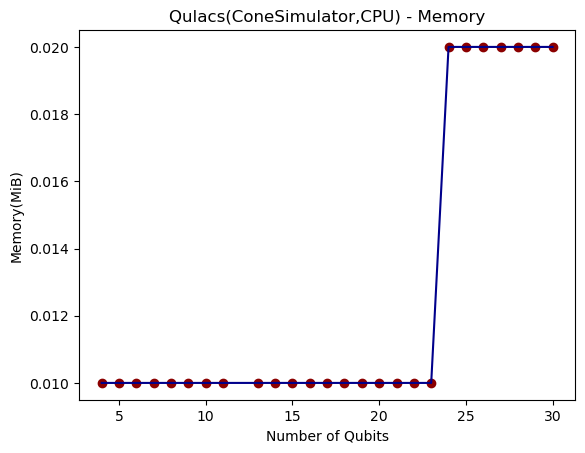

In [3]:
import matplotlib.pyplot as plt


# Extract x and y values from dict1
x1 = list(data.keys())
x1.sort()
y1 = [data[x][1] for x in x1]

# Plot the data points
# plt.plot(x1, y1, label='Pennylane(default.qubit)',color='darkblue')
plt.plot(x1, y1,color='darkblue')

# Add data points for dict1
plt.scatter(x1, y1, color='darkred')


# Add labels and title
plt.xlabel('Number of Qubits')
# plt.ylabel('Runtime(s)')
plt.ylabel('Memory(MiB)')
# plt.title('Qulacs(ConeSimulator,CPU) - Runtime')
plt.title('Qulacs(ConeSimulator,CPU) - Memory')

# Show the plot
plt.show()